In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Calculate the date 1 year ago from the last data point in the database
# Latest Date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
last_date

'2017-08-23'

In [11]:
twelve_months_back = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
twelve_months_back


datetime.datetime(2016, 8, 23, 0, 0)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
perp_results = session.query(Measurement.date, func.avg(Measurement.prcp)).filter(Measurement.date >= twelve_months_back).\
                    group_by(Measurement.date).all()
perp_results

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [13]:

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

p_df = pd.DataFrame(perp_results, columns=['Date', 'Precipitation'])
p_df['Date'] = pd.to_datetime(p_df['Date'])
p_df.head()

,Date,Precipitation
0,2016-08-24,1.555000
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.064000
4,2016-08-28,0.516667


In [14]:
# Sort the dataframe by date
p_df.set_index('Date', inplace=True)

p_df.head()

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


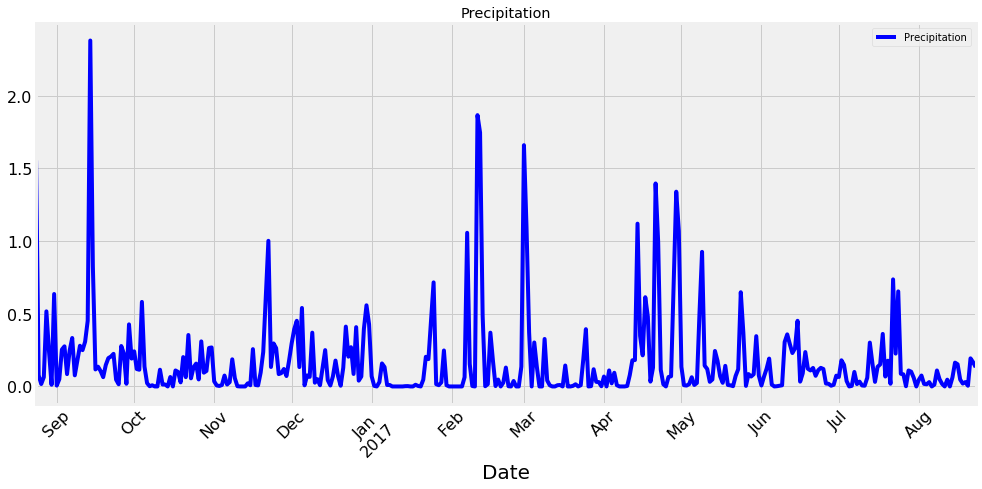

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data

p_df.plot(figsize=(15, 7), sort_columns=True, rot=45, use_index=True, title='Precipitation', 
               legend=True, fontsize=16, grid=True, color='blue')

plt.xlabel('Date', fontsize=20)
plt.show()

![precipitation](Images/precipitation.png)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
p_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


![describe](Images/describe.png)

In [17]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.id).count()
print(f'There are {station_count} weather stations')

There are 9 weather stations


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [19]:
station_activity 

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#station_activity[0]
most_active_station=station_activity[0][0]
most_active_station

'USC00519281'

In [21]:

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
most_active_temps

[(54.0, 85.0, 71.66378066378067)]

In [22]:
most_temps_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_temps_station= most_temps_station[0]

In [23]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query( Measurement.tobs).filter(Measurement.date >= twelve_months_back).filter(Measurement.station == most_temps_station).all()
tobs = pd.DataFrame(tobs, columns=['temperature'])

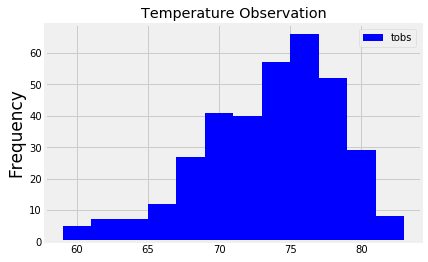

In [24]:
tobs.plot.hist(bins=12, title="Temperature Observation", color='blue')

plt.ylabel('Frequency', fontsize=17)

labels = ['tobs']

plt.legend(labels)

plt.show()

![precipitation](Images/station-histogram.png)

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    
    #store dates in list
    temp_list = []
    
    # query temperatutes between dates
    querys = session.query(Measurement.tobs).filter(Measurement.date>=start_date, Measurement.date<=end_date).all()
    
    
    temperatures = [temp[0] for temp in querys]
    # add average temperature to list
    temp_list.append(np.mean(temperatures))
    # add min temperature to list
    temp_list.append(min(temperatures))
    #add max temperature to list
    temp_list.append(max(temperatures))
    
    return temp_list


In [26]:
#this allows me to use the relativedelta function to easily subtract 1 year
from dateutil.relativedelta import relativedelta

#trip days
trip_start = '2018-01-01'
trip_end = '2018-01-11'

trip_start = dt.datetime.strptime(trip_start, "%Y-%m-%d") - relativedelta(years=1)
trip_end = dt.datetime.strptime(trip_end, "%Y-%m-%d") - relativedelta(years=1)

trip_start

datetime.datetime(2017, 1, 1, 0, 0)

In [27]:
#convert back to string
last_year_start = trip_start.strftime("%Y-%m-%d")
last_year_end = trip_end.strftime("%Y-%m-%d")
last_year_end

'2017-01-11'

In [29]:
# Used the previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for the trip using the previous year's data for those same dates.
temp_list = calc_temps(last_year_start, last_year_end)

In [30]:
#average, min, max temps
temp_list

[68.14925373134328, 60.0, 78.0]

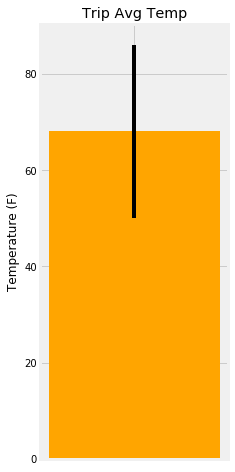

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(figsize=(3,8))
plt.bar(1, temp_list[0], yerr=(temp_list[2] - temp_list[1]), tick_label='', color='orange')
plt.ylabel("Temperature (F)")
plt.title("Trip Avg Temp")
plt.show()

In [32]:
# Calculate the total amount of rainfall per weather station for the trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

station_rainfall = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, \
func.sum(Measurement.prcp).label('precipitation')).\
filter(Measurement.station == Station.station, Measurement.date >= last_year_start, Measurement.date <= last_year_end).\
group_by(Measurement.station)

In [33]:
rainfall_df = pd.DataFrame(station_rainfall)


In [34]:
rainfall_df = rainfall_df.sort_values('precipitation')
rainfall_df

,station,name,latitude,longitude,elevation,precipitation
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.00
4,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.20
0,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.35
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.61
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.63
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.63
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]